# Prepare Data

For real data, as obtained from Google Earth Engine, Earth Explorer, or ArcGIS, you should sample in some random pattern. 

For our lab, since I cannot provide you directly with real images, I provide synthetic data to reduce download time, and setup complexity. I synthesize the images (using Stable Diffusion, the geographic location information, the faux MODIS burn area polygon, as well as the labels (to ensure these faux images have some sort of fire/no fire predictability.

Here I desire to keep my classes balanced, meaning I want the same number of points for both fire and NoFire classes.

<figure>
<img src="assets/plot_labels_map.png" width="600">
<figcaption align = "center"> Image by pvproductions on Freepik: ”https://www.freepik.com/free-photo/fire-forest-flames-generative-ai_39872388.htm#query=forest%20fire&position=1&from_view=search&track=ais"</figcaption>
</figure>


## Manipulate RGB space of synthetic images to encourage fire prediction

Take synthetically generated images and seed them to skew the class data slightly to ensure the model can converge. Adjust R and G channels up or down by a few percent to "salt" the data.

In [1]:
from PIL import Image
import os
import glob
import pandas as pd

try:
    os.makedirs('data/colorEnhanced/train/NoFire')
    os.makedirs('data/colorEnhanced/val/NoFire')
    os.makedirs('data/colorEnhanced/train/Fire')
    os.makedirs('data/colorEnhanced/val/Fire')
except:
    print("folder already exist")

perc = .05
print("percent to change Fire", perc)

def shiftIm(fldrIn, fn, fldrOut, perc=-.04, type='png'):
    path = fldrIn + fn
    im = Image.open(path).convert('RGB')

    # Split into 3 channels
    r, g, b = im.split()
    # Increase Reds
    r = r.point(lambda i: i * (1+perc))

    # Decrease Greens
    g = g.point(lambda i: i * (1-perc))

    # Recombine back to RGB image
    result = Image.merge('RGB', (r, g, b))

    result.save(f'{fldrOut}/{fn}')
    im.close()
# cropIm(fldrIn, fn, fldrOut)

import glob
FireList = []
NoFireList = []

fldrIn = "data/synthetic/train/Fire/"
fldrOut = "data/colorEnhanced/train/Fire/"
for fire, fn in enumerate(glob.glob(fldrIn+"*.png")):
    fn_trunc = fn.split('/')[-1]
    FireList.append(fn_trunc)
    shiftIm(fldrIn, fn_trunc, fldrOut, perc, 'png')
print("completed train set")
fldrIn = "data/synthetic/val/Fire/"
fldrOut = "data/colorEnhanced/val/Fire/"
for fire, fn in enumerate(glob.glob(fldrIn+"*.png")):
    fn_trunc = fn.split('/')[-1]
    FireList.append(fn_trunc)
    shiftIm(fldrIn, fn_trunc, fldrOut, perc, 'png')
print("completed val set")

perc = -1 * perc
print("percent to change NoFire", perc)

fldrIn = "data/synthetic/train/NoFire/"
fldrOut = "data/colorEnhanced/train/NoFire"
for fire, fn in enumerate(glob.glob(fldrIn+"*.png")):
    fn_trunc = fn.split('/')[-1]
    FireList.append(fn_trunc)
    shiftIm(fldrIn, fn_trunc, fldrOut, perc, 'png')
print("completed train set")
fldrIn = "data/synthetic/val/NoFire/"
fldrOut = "data/colorEnhanced/val/NoFire/"
for fire, fn in enumerate(glob.glob(fldrIn+"*.png")):
    fn_trunc = fn.split('/')[-1]
    FireList.append(fn_trunc)
    shiftIm(fldrIn, fn_trunc, fldrOut, perc, 'png')
print("completed val set")
print(f"File created: { len(glob.glob('data/synthetic/*/*/*.png')) }")
print("done")


percent to change Fire 0.05
completed train set
completed val set
percent to change NoFire -0.05
completed train set
completed val set
File created: 250
done


In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from shapely.geometry import Point
from shapely.geometry import Polygon as GPoly
import pandas as pd
import numpy as np


usgs = pd.read_csv('data/USGS_NAIP_Sampled_Mapping.csv')
usgs['Longitude'] = usgs['Centroid'].apply(lambda x: float(x.split('(')[-1].replace(')','').replace(' ','').split(',')[0]))
usgs['Lattitude'] = usgs['Centroid'].apply(lambda x: float(x.split('(')[-1].replace(')','').replace(' ','').split(',')[1]))

## Read the Images folder: Extract file names

- first 100 images are train
- next 25 images are val

In [3]:
import glob
SyntheticTrainFirefn = []
SyntheticTrainNoFirefn = []
SyntheticValFirefn = []
SyntheticValNoFirefn = []

path = 'data/colorEnhanced/train/Fire/*.png'
for fn in glob.glob(path):
    SyntheticTrainFirefn.append(fn.split('/')[-1])
                         
path = 'data/colorEnhanced/val/Fire/*.png'
for fn in glob.glob(path):
    SyntheticValFirefn.append(fn.split('/')[-1])
    
path = 'data/colorEnhanced/train/NoFire/*.png'
for fn in glob.glob(path):
    SyntheticTrainNoFirefn.append(fn.split('/')[-1])
                         
path = 'data/colorEnhanced/val/NoFire/*.png'
for fn in glob.glob(path):
    SyntheticValNoFirefn.append(fn.split('/')[-1])
    


## Plot the Synthetic MODIS points shape of a star


125


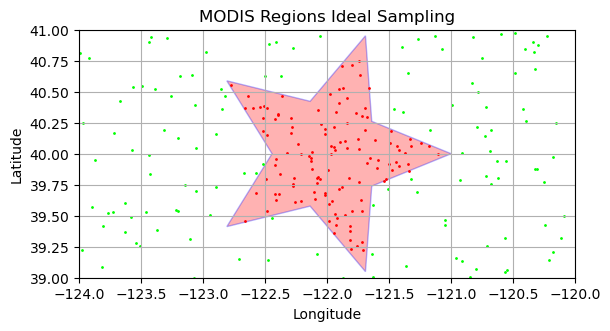

In [4]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from shapely.geometry import Polygon as GPoly
from shapely.geometry import Point
import random
import numpy as np

use = len(SyntheticTrainFirefn) + len(SyntheticValFirefn)  # subsample the number of images we have in  folders
print(use)

fig, ax = plt.subplots()

N_rnd = 2000

xrnd = 4*np.random.sample(N_rnd) - 124
yrnd = 2*np.random.sample(N_rnd) + 39
prnd = np.array(list(zip(xrnd, yrnd)))

# Create star shape for synthetic MODIS
import numpy as np
pi = np.pi
x = []
y = []
for k in range(0,5):
    r = 4/9
    x.append( r*np.cos(2*pi*k/5 - 2*pi/10) - 122 )
    y.append( r*np.sin(2*pi*k/5 - 2*pi/10) + 40 )
    r = 1
    x.append(  r*np.cos(2*pi*k/5) - 122)
    y.append(  r*np.sin(2*pi*k/5) + 40)
    
polyStar =  np.array(list(zip(x,y))) 
polyStarP = Polygon(polyStar, closed=True,  fc=(1,0,0,0.3),  ec=(0,0,1,0.3))
polyStarG = GPoly(polyStar)
ax.add_patch(polyStarP)

# Color polyStar points red
test = []
for point in prnd:
    #test.append(point_out_polygon(point, polyStar))
    test.append(not polyStarG.contains(Point(point)))
test = np.array(test)
VertNoFire = np.array(list(zip(xrnd[test==True], yrnd[test==True])))

np.save('data/SyntheticVerticesTrainNoFire.npy', VertNoFire[:100])
np.save('data/SyntheticVerticesValNoFire.npy', VertNoFire[100:125])

# Color polyStar points red
test = []
for point in prnd:
    #test.append(point_in_polygon(point, polyStar))
    test.append(polyStarG.contains(Point(point)))
test = np.array(test)
VertFire = np.array(list(zip(xrnd[test==True], yrnd[test==True])))

np.save('data/SyntheticVerticesTrainFire.npy', VertFire[:100])
np.save('data/SyntheticVerticesValFire.npy', VertFire[100:125])

plt.scatter(VertFire[:use,0], VertFire[:use,1], s= 1, c='r')
plt.scatter(VertNoFire[:use,0], VertNoFire[:use,1], s= 1, c='lime')

# Set the aspect ratio and limits
plt.gca().set_aspect('equal')
plt.xlim(-124, -120)
plt.ylim(39.0, 41.0)
plt.grid()
# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('MODIS Regions Ideal Sampling')

# Show the plot
plt.show()    


## Save synthetic data to CSV

Creates mapping between file name and point coordinates that have been color shifted.

In [5]:
import pandas as pd
df1 = pd.DataFrame(VertNoFire[:125])
df1['Class'] = 'NoFire'
df1['Name'] = SyntheticTrainNoFirefn + SyntheticValNoFirefn

df2 = pd.DataFrame(VertFire[:125])
df2['Class'] = 'Fire'
df2['Name'] = SyntheticTrainFirefn + SyntheticValFirefn

ColorEnhanced_df = pd.concat([df1, df2])
ColorEnhanced_df.columns = ['Long', 'Lat', 'Class', 'Name']
ColorEnhanced_df.to_csv('data/ColorEnhanced_Mapping.csv')
ColorEnhanced_df

,Long,Lat,Class,Name
0,-122.667546,39.848558,NoFire,m_3912045_ne_10_h_20160712_sparse_vegetation_n...
1,-121.048295,39.428027,NoFire,m_3912045_ne_10_h_20160712_early_morning_with_...
2,-122.572523,39.844369,NoFire,m_3912045_ne_10_h_20160712_dense_vegetation_wi...
3,-120.726678,40.141491,NoFire,m_3912045_ne_10_h_20160712_late_afternoon_with...
4,-122.059939,40.951391,NoFire,m_3912343_se_10_h_20160529_dense_vegetation_wi...
...,...,...,...,...
120,-122.272403,39.758459,Fire,m_4012355_se_10_h_20160713_early_morning_with_...
121,-121.715329,39.534339,Fire,m_4012355_se_10_h_20160713_late_afternoon_with...
122,-121.948133,40.051808,Fire,m_4012355_se_10_h_20160713_mid-day_signs_of_wi...
123,-122.084748,39.808083,Fire,m_4012355_se_10_h_20160713_late_afternoon_1.png


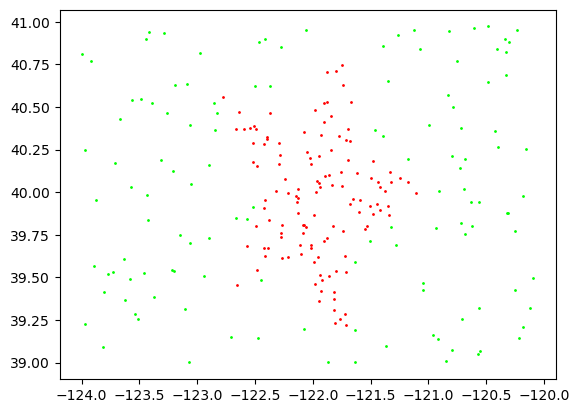

In [6]:
plt.scatter(VertFire[:125,0], VertFire[:125,1], c = 'r', s = 1)
plt.scatter(VertNoFire[:125,0], VertNoFire[:125,1], c = 'lime', s = 1)

In [7]:
print("Done!")

Done!


## Notices and Disclaimers

Intel technologies may require enabled hardware, software or service activation.

No product or component can be absolutely secure. 

Your costs and results may vary. 

© Intel Corporation. Intel, the Intel logo, and other Intel marks are trademarks of Intel Corporation or its subsidiaries. Other names and brands may be claimed as the property of others. 